In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
reading_results = pd.read_excel('Nigeria CuC Data - 2024 10 08.xlsx', sheet_name = 4)
students = pd.read_excel('Nigeria CuC Data - 2024 10 08.xlsx', sheet_name = 3)
literacy = pd.read_excel('Nigeria-Additional Data - 2024 10 15.xlsx', sheet_name = 0)
print(reading_results.head())
print(students.head())
print(literacy.head())

   ChildrenId ResultBaseline ResultRound1 ResultRound2 ResultRound3  \
0       10656            NaN     Beginner     Beginner       Letter   
1        7814       Beginner     Beginner     Beginner       Letter   
2        7918       Beginner     Beginner       Letter       Letter   
3        7872       Beginner     Beginner     Beginner       Letter   
4        8857       Beginner     Beginner     Beginner       Letter   

  ResultEndline Baseline to Round 1 Round 1 to Round 2 Round 2 to Round 3  \
0           NaN                 NaN    Stayed The Same           Increase   
1           NaN     Stayed The Same    Stayed The Same           Increase   
2           NaN     Stayed The Same           Increase    Stayed The Same   
3           NaN     Stayed The Same    Stayed The Same           Increase   
4           NaN     Stayed The Same    Stayed The Same           Increase   

  Round 3 to Endline  ... AcademicYearName    Cycle  \
0                NaN  ...  2023-CuC-Cycle1  Cycle 1   


In [2]:
students = students.drop(columns=['Gender', 'DateOfBirth', 'Special_Needs','LearnerWithDisability','AGE', 'HearingStatus', 
                                  'ConcentratingStatus', 'SeeingStatus', 'CommunicatingStatus', 'WalkingStatus', 'SelfCareStatus', 
                                 'DeleteReasonId'])
reading_results = reading_results.drop(columns=['IsCUCSatisfied?', 'AcademicYearName'])
merged_data = reading_results.merge(students, on='ChildrenId', how='left')
print(merged_data.head())
print(merged_data.columns)

   ChildrenId ResultBaseline ResultRound1 ResultRound2 ResultRound3  \
0       10656            NaN     Beginner     Beginner       Letter   
1        7814       Beginner     Beginner     Beginner       Letter   
2        7918       Beginner     Beginner       Letter       Letter   
3        7872       Beginner     Beginner     Beginner       Letter   
4        8857       Beginner     Beginner     Beginner       Letter   

  ResultEndline Baseline to Round 1 Round 1 to Round 2 Round 2 to Round 3  \
0           NaN                 NaN    Stayed The Same           Increase   
1           NaN     Stayed The Same    Stayed The Same           Increase   
2           NaN     Stayed The Same           Increase    Stayed The Same   
3           NaN     Stayed The Same    Stayed The Same           Increase   
4           NaN     Stayed The Same    Stayed The Same           Increase   

  Round 3 to Endline  ... ParentTypeId  ParentType  DisabilityCommunicating  \
0                NaN  ...      

In [3]:
literacy = literacy.iloc[:, [1, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14]]
merged_data = merged_data.merge(literacy, on='ChildrenId', how='left')
df = merged_data.copy()
local = merged_data.copy()
print(merged_data.head())
print(merged_data.columns)

   ChildrenId ResultBaseline ResultRound1 ResultRound2 ResultRound3  \
0       10656            NaN     Beginner     Beginner       Letter   
1       10656            NaN     Beginner     Beginner       Letter   
2       10656            NaN     Beginner     Beginner       Letter   
3        7814       Beginner     Beginner     Beginner       Letter   
4        7814       Beginner     Beginner     Beginner       Letter   

  ResultEndline Baseline to Round 1 Round 1 to Round 2 Round 2 to Round 3  \
0           NaN                 NaN    Stayed The Same           Increase   
1           NaN                 NaN    Stayed The Same           Increase   
2           NaN                 NaN    Stayed The Same           Increase   
3           NaN     Stayed The Same    Stayed The Same           Increase   
4           NaN     Stayed The Same    Stayed The Same           Increase   

  Round 3 to Endline  ...        AcademicYearName  CommunicationIssue  \
0                NaN  ...  2023-CuC &

In [4]:
missing_data_percentage = merged_data.isnull().mean() * 100
missing_data_percentage_sorted = missing_data_percentage.sort_values(ascending=False)
print(missing_data_percentage_sorted)

IsTelephoneAvailable?              93.654471
IsRadioTVAvailable?                93.654471
IsElectricityAvailable?            93.654471
Selfcare                           77.937617
CommunicationIssue                 77.937617
MemoryConcentration                77.937617
Hearing                            77.937617
Walking/Climbing                   77.937617
Vision                             77.937617
Round 1 to Round 2                 71.273947
Round 2 to Round 3                 63.918667
Round 3 to Endline                 60.553980
ResultRound2                       59.326371
TotalhoursIncreaseOnelevel         55.999723
AttendanceIncreaseOneLevel         55.999723
Baseline_Endline                   53.786569
Baseline to Endline                53.786569
Baseline to Round 1                53.319732
ResultRound1                       51.939968
ResultRound3                       40.549139
ResultEndline                      29.217097
DisabilityCommunicating            29.123729
Disability

In [5]:
mapping = {
    "Don't_know": 0,
    "No": 1,
    "Yes": 2
}

merged_data['IsTelephoneAvailable?'] = merged_data['IsTelephoneAvailable?'].map(mapping).fillna(0)
merged_data['IsRadioTVAvailable?'] = merged_data['IsRadioTVAvailable?'].map(mapping).fillna(0)
merged_data['IsElectricityAvailable?'] = merged_data['IsElectricityAvailable?'].map(mapping).fillna(0)

In [6]:
mapping = {
    "Cannot do at all": 1,
    "Cannot_do_at_all": 1,
    "A lot of difficulty": 2,
    "lot_difficulty": 2,
    "Some difficulty": 3,
    "some_difficulty": 3,
    "No difficulty": 4,
    "no_difficulty": 4,
    "don't_know": 0,
    "refused": 0
}

merged_data['CommunicationIssue'] = merged_data['CommunicationIssue'].map(mapping).fillna(0)
merged_data['MemoryConcentration'] = merged_data['MemoryConcentration'].map(mapping).fillna(0)
merged_data['Hearing'] = merged_data['Hearing'].map(mapping).fillna(0)
merged_data['Vision'] = merged_data['Vision'].map(mapping).fillna(0)
merged_data['Walking/Climbing'] = merged_data['Walking/Climbing'].map(mapping).fillna(0)
merged_data['Selfcare'] = merged_data['Selfcare'].map(mapping).fillna(0)

In [7]:
mapping = {
    "Decrease": -1,
    "Stayed The Same": 0,
    "Increase": 1
}

merged_data['Baseline to Round 1'] = merged_data['Baseline to Round 1'].map(mapping).fillna(0)
merged_data['Round 1 to Round 2'] = merged_data['Round 1 to Round 2'].map(mapping).fillna(0)
merged_data['Round 2 to Round 3'] = merged_data['Round 2 to Round 3'].map(mapping).fillna(0)
merged_data['Round 3 to Endline'] = merged_data['Round 3 to Endline'].map(mapping).fillna(0)
merged_data['Baseline to Endline'] = merged_data['Baseline to Endline'].map(mapping).fillna(0)

In [8]:
reading_level_mapping = {
    "Beginner": 1,
    "Letter": 2,
    "Word": 3,
    "Sentence": 4,
    "Story": 5
}

merged_data['ResultBaseline'] = merged_data['ResultBaseline'].map(reading_level_mapping).fillna(0)
merged_data['ResultRound1'] = merged_data['ResultRound1'].map(reading_level_mapping).fillna(0)
merged_data['ResultRound2'] = merged_data['ResultRound2'].map(reading_level_mapping).fillna(0)
merged_data['ResultRound3'] = merged_data['ResultRound3'].map(reading_level_mapping).fillna(0)
merged_data['ResultEndline'] = merged_data['ResultEndline'].map(reading_level_mapping).fillna(0)

In [9]:
disability_mapping = {
    "Cannot_do_at_all": 1,
    "A lot of difficulty": 2,
    "lot_difficulty": 2,
    "Some difficulty": 3,
    "some_difficulty": 3,
    "No difficulty": 4,
    "no_difficulty": 4,
    "don't_know": 0,
    "refused": 0,
}

merged_data['DisabilityCommunicating'] = merged_data['DisabilityCommunicating'].map(disability_mapping).fillna(0)
merged_data['DisabilityWalking'] = merged_data['DisabilityWalking'].map(disability_mapping).fillna(0)
merged_data['DisabilitySelfCare'] = merged_data['DisabilitySelfCare'].map(disability_mapping).fillna(0)
merged_data['DisabilitySeeing'] = merged_data['DisabilitySeeing'].map(disability_mapping).fillna(0)
merged_data['DisabilityHearing'] = merged_data['DisabilityHearing'].map(disability_mapping).fillna(0)
merged_data['DisabilityConcentrating'] = merged_data['DisabilityConcentrating'].map(disability_mapping).fillna(0)

In [10]:
merged_data['Attendace_PresentDays'] = merged_data['Attendace_PresentDays'].fillna(0)
merged_data['Attendace_ChildrenDays'] = merged_data['Attendace_ChildrenDays'].fillna(0)
merged_data['AttendaceRate'] = merged_data['AttendaceRate'].fillna(0)

In [11]:
gender_mapping = {
    "Male": 1,
    "Female": 0
}

merged_data['Gender'] = merged_data['Gender'].map(gender_mapping)

In [12]:
merged_data['ComprehensionAchieved'] = merged_data['ComprehensionAchieved'].map({True: 1, False: 0})
merged_data['StoryAchieved'] = merged_data['StoryAchieved'].map({True: 1, False: 0})
merged_data['TrackIncreaseOneLevel'] = merged_data['TrackIncreaseOneLevel'].map({True: 1, False: 0})
merged_data['AtLeastAchievedSentence'] = merged_data['AtLeastAchievedSentence'].map({True: 1, False: 0})
merged_data['LearnerAskingDisabilityQuestion'] = merged_data['LearnerAskingDisabilityQuestion'].map({True: 1, False: 0})
merged_data['LearnerWithDisability'] = merged_data['LearnerWithDisability'].map({True: 1, False: 0})

In [13]:
age_group_mapping = {
    "10 years old or less": 1,
    "11–12 years old": 2,
    "13 years old or more": 3
}

merged_data['AgeGroup'] = merged_data['AgeGroup'].map(age_group_mapping).fillna(0)

In [14]:
md = merged_data.copy()
merged_data = merged_data.select_dtypes(include=[np.number])
print("Remaining numeric columns:", merged_data.columns)
print(merged_data.dtypes)

Remaining numeric columns: Index(['ChildrenId', 'ResultBaseline', 'ResultRound1', 'ResultRound2',
       'ResultRound3', 'ResultEndline', 'Baseline to Round 1',
       'Round 1 to Round 2', 'Round 2 to Round 3', 'Round 3 to Endline',
       'Baseline to Endline', 'AcademicYearId', 'Year', 'Gender',
       'ComprehensionAchieved', 'StoryAchieved', 'TrackIncreaseOneLevel',
       'AttendanceIncreaseOneLevel', 'TotalhoursIncreaseOnelevel',
       'AtLeastAchievedSentence', 'Attendace_PresentDays',
       'Attendace_ChildrenDays', 'AttendaceRate', 'LearnerWithDisability',
       'SchoolId', 'ClassId', 'ParentTypeId', 'DisabilityCommunicating',
       'DisabilityConcentrating', 'DisabilityHearing', 'DisabilitySeeing',
       'DisabilitySelfCare', 'DisabilityWalking',
       'LearnerAskingDisabilityQuestion', 'AgeGroup', 'CommunicationIssue',
       'MemoryConcentration', 'Hearing', 'Vision', 'Selfcare',
       'Walking/Climbing', 'IsElectricityAvailable?', 'IsRadioTVAvailable?',
       'IsT

In [15]:
cols_to_drop = ['AcademicYearId', 'Year', 'ComprehensionAchieved', 'StoryAchieved', 'LearnerWithDisability', 'ChildrenId']
merged_data = merged_data.drop(columns=cols_to_drop)
merged_data['AttendanceIncreaseOneLevel'] = merged_data['AttendanceIncreaseOneLevel'].fillna(0)
merged_data['TotalhoursIncreaseOnelevel'] = merged_data['TotalhoursIncreaseOnelevel'].fillna(0)
merged_data['ParentTypeId'] = merged_data['ParentTypeId'].fillna(0)
correlation_matrix = merged_data.corr()
print(correlation_matrix)

                                 ResultBaseline  ResultRound1  ResultRound2  \
ResultBaseline                         1.000000      0.505612      0.444059   
ResultRound1                           0.505612      1.000000      0.379893   
ResultRound2                           0.444059      0.379893      1.000000   
ResultRound3                           0.541042      0.547607      0.486200   
ResultEndline                         -0.235227      0.015500     -0.006353   
Baseline to Round 1                    0.050979      0.637120      0.151706   
Round 1 to Round 2                     0.108580      0.032788      0.445915   
Round 2 to Round 3                     0.116555      0.104795      0.126378   
Round 3 to Endline                     0.127443      0.105280      0.071488   
Baseline to Endline                    0.355046      0.366394      0.327491   
Gender                                 0.014251     -0.017776     -0.002654   
TrackIncreaseOneLevel                  0.185195     

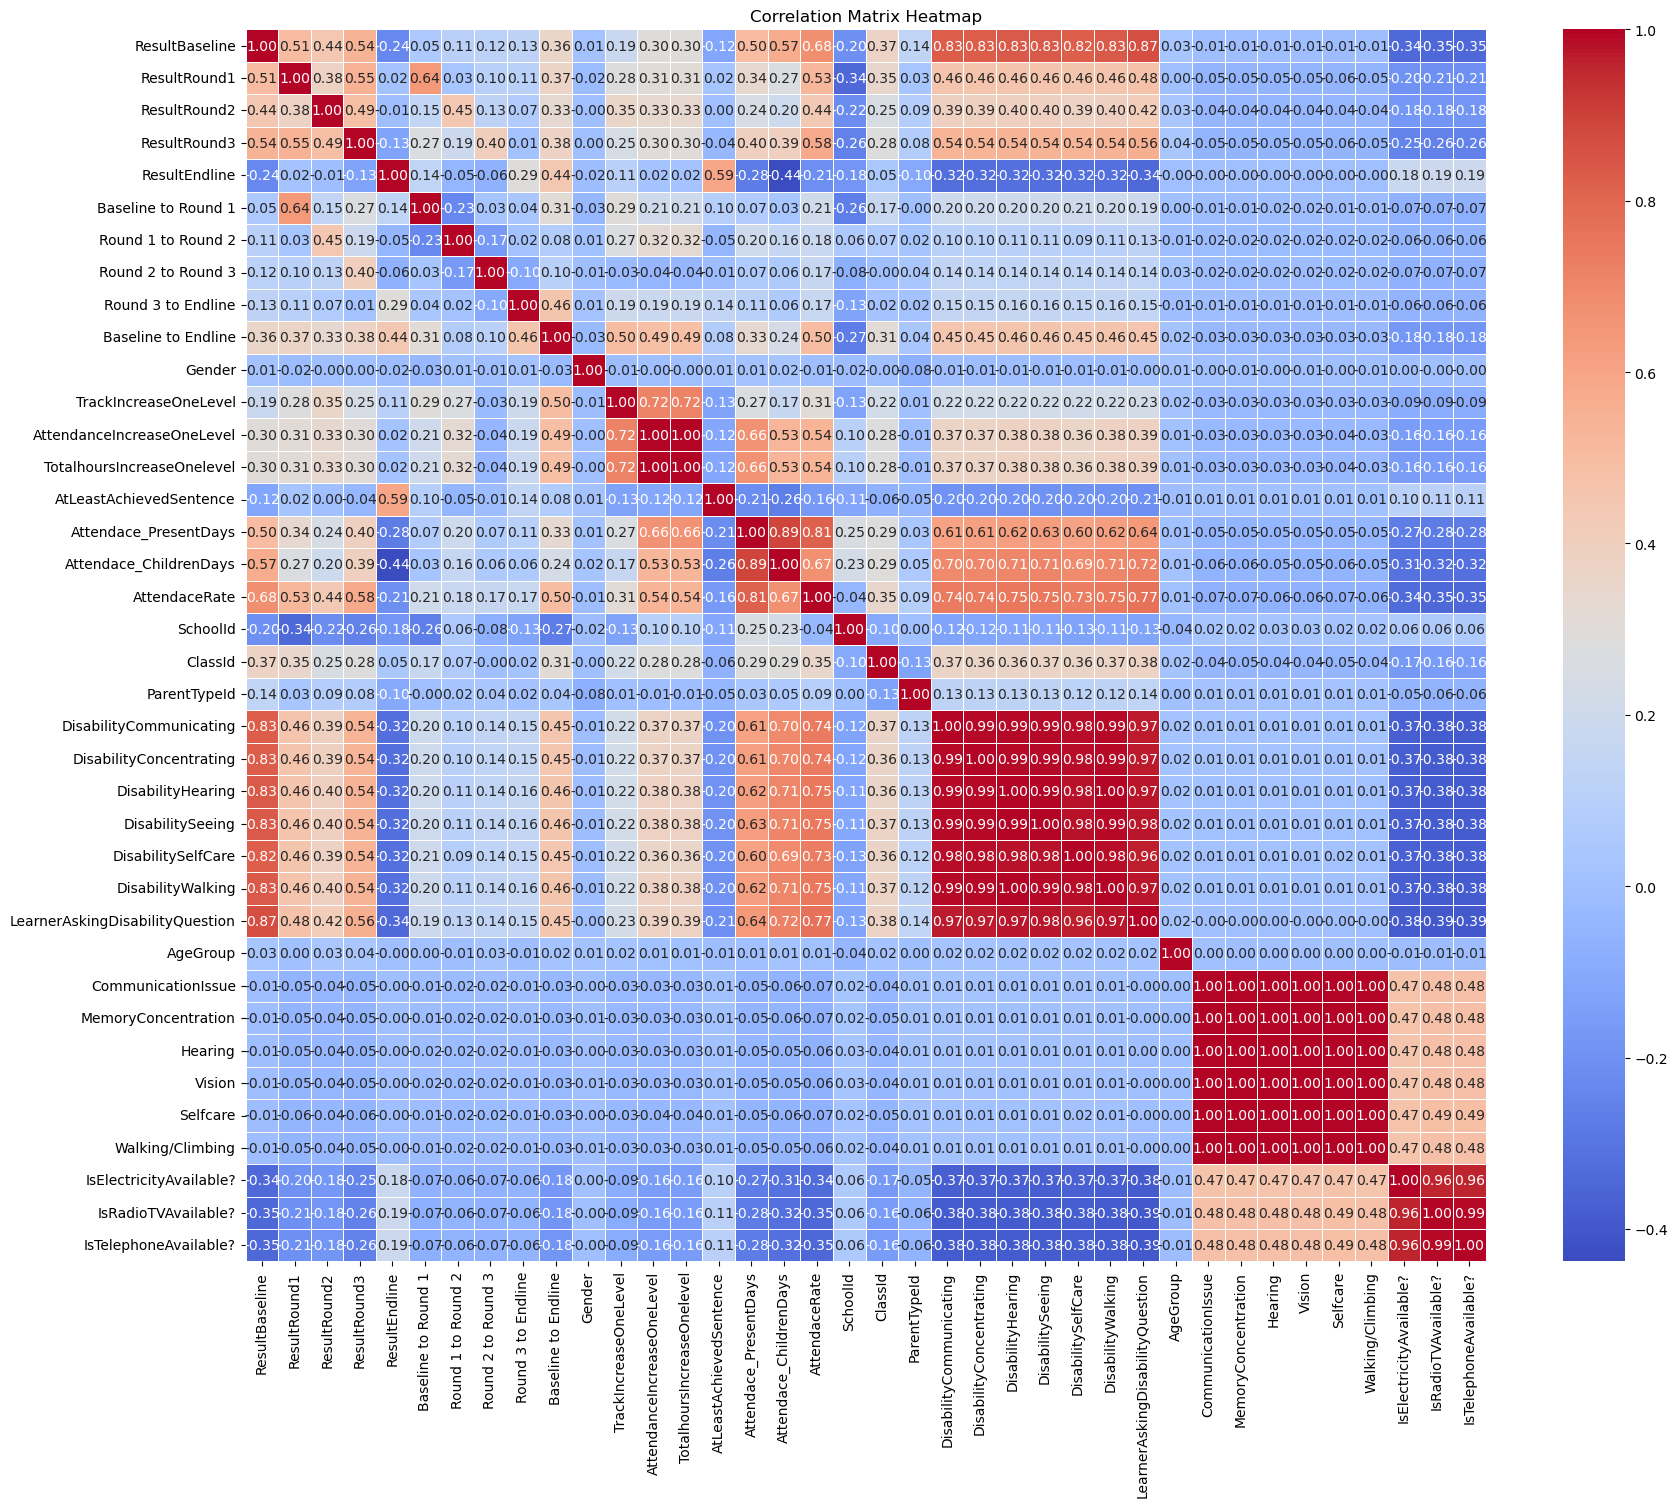

In [16]:
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [17]:
print(merged_data.isnull().sum())
print(np.isinf(merged_data).sum())

ResultBaseline                     0
ResultRound1                       0
ResultRound2                       0
ResultRound3                       0
ResultEndline                      0
Baseline to Round 1                0
Round 1 to Round 2                 0
Round 2 to Round 3                 0
Round 3 to Endline                 0
Baseline to Endline                0
Gender                             0
TrackIncreaseOneLevel              0
AttendanceIncreaseOneLevel         0
TotalhoursIncreaseOnelevel         0
AtLeastAchievedSentence            0
Attendace_PresentDays              0
Attendace_ChildrenDays             0
AttendaceRate                      0
SchoolId                           0
ClassId                            0
ParentTypeId                       0
DisabilityCommunicating            0
DisabilityConcentrating            0
DisabilityHearing                  0
DisabilitySeeing                   0
DisabilitySelfCare                 0
DisabilityWalking                  0
L

In [18]:
import statsmodels.api as sm
X = merged_data.drop(columns=['Baseline to Endline'])
y = merged_data['Baseline to Endline']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Baseline to Endline   R-squared:                       0.792
Model:                             OLS   Adj. R-squared:                  0.792
Method:                  Least Squares   F-statistic:                     3063.
Date:                 Fri, 15 Nov 2024   Prob (F-statistic):               0.00
Time:                         14:34:52   Log-Likelihood:                 2607.4
No. Observations:                28918   AIC:                            -5141.
Df Residuals:                    28881   BIC:                            -4835.
Df Model:                           36                                         
Covariance Type:             nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------


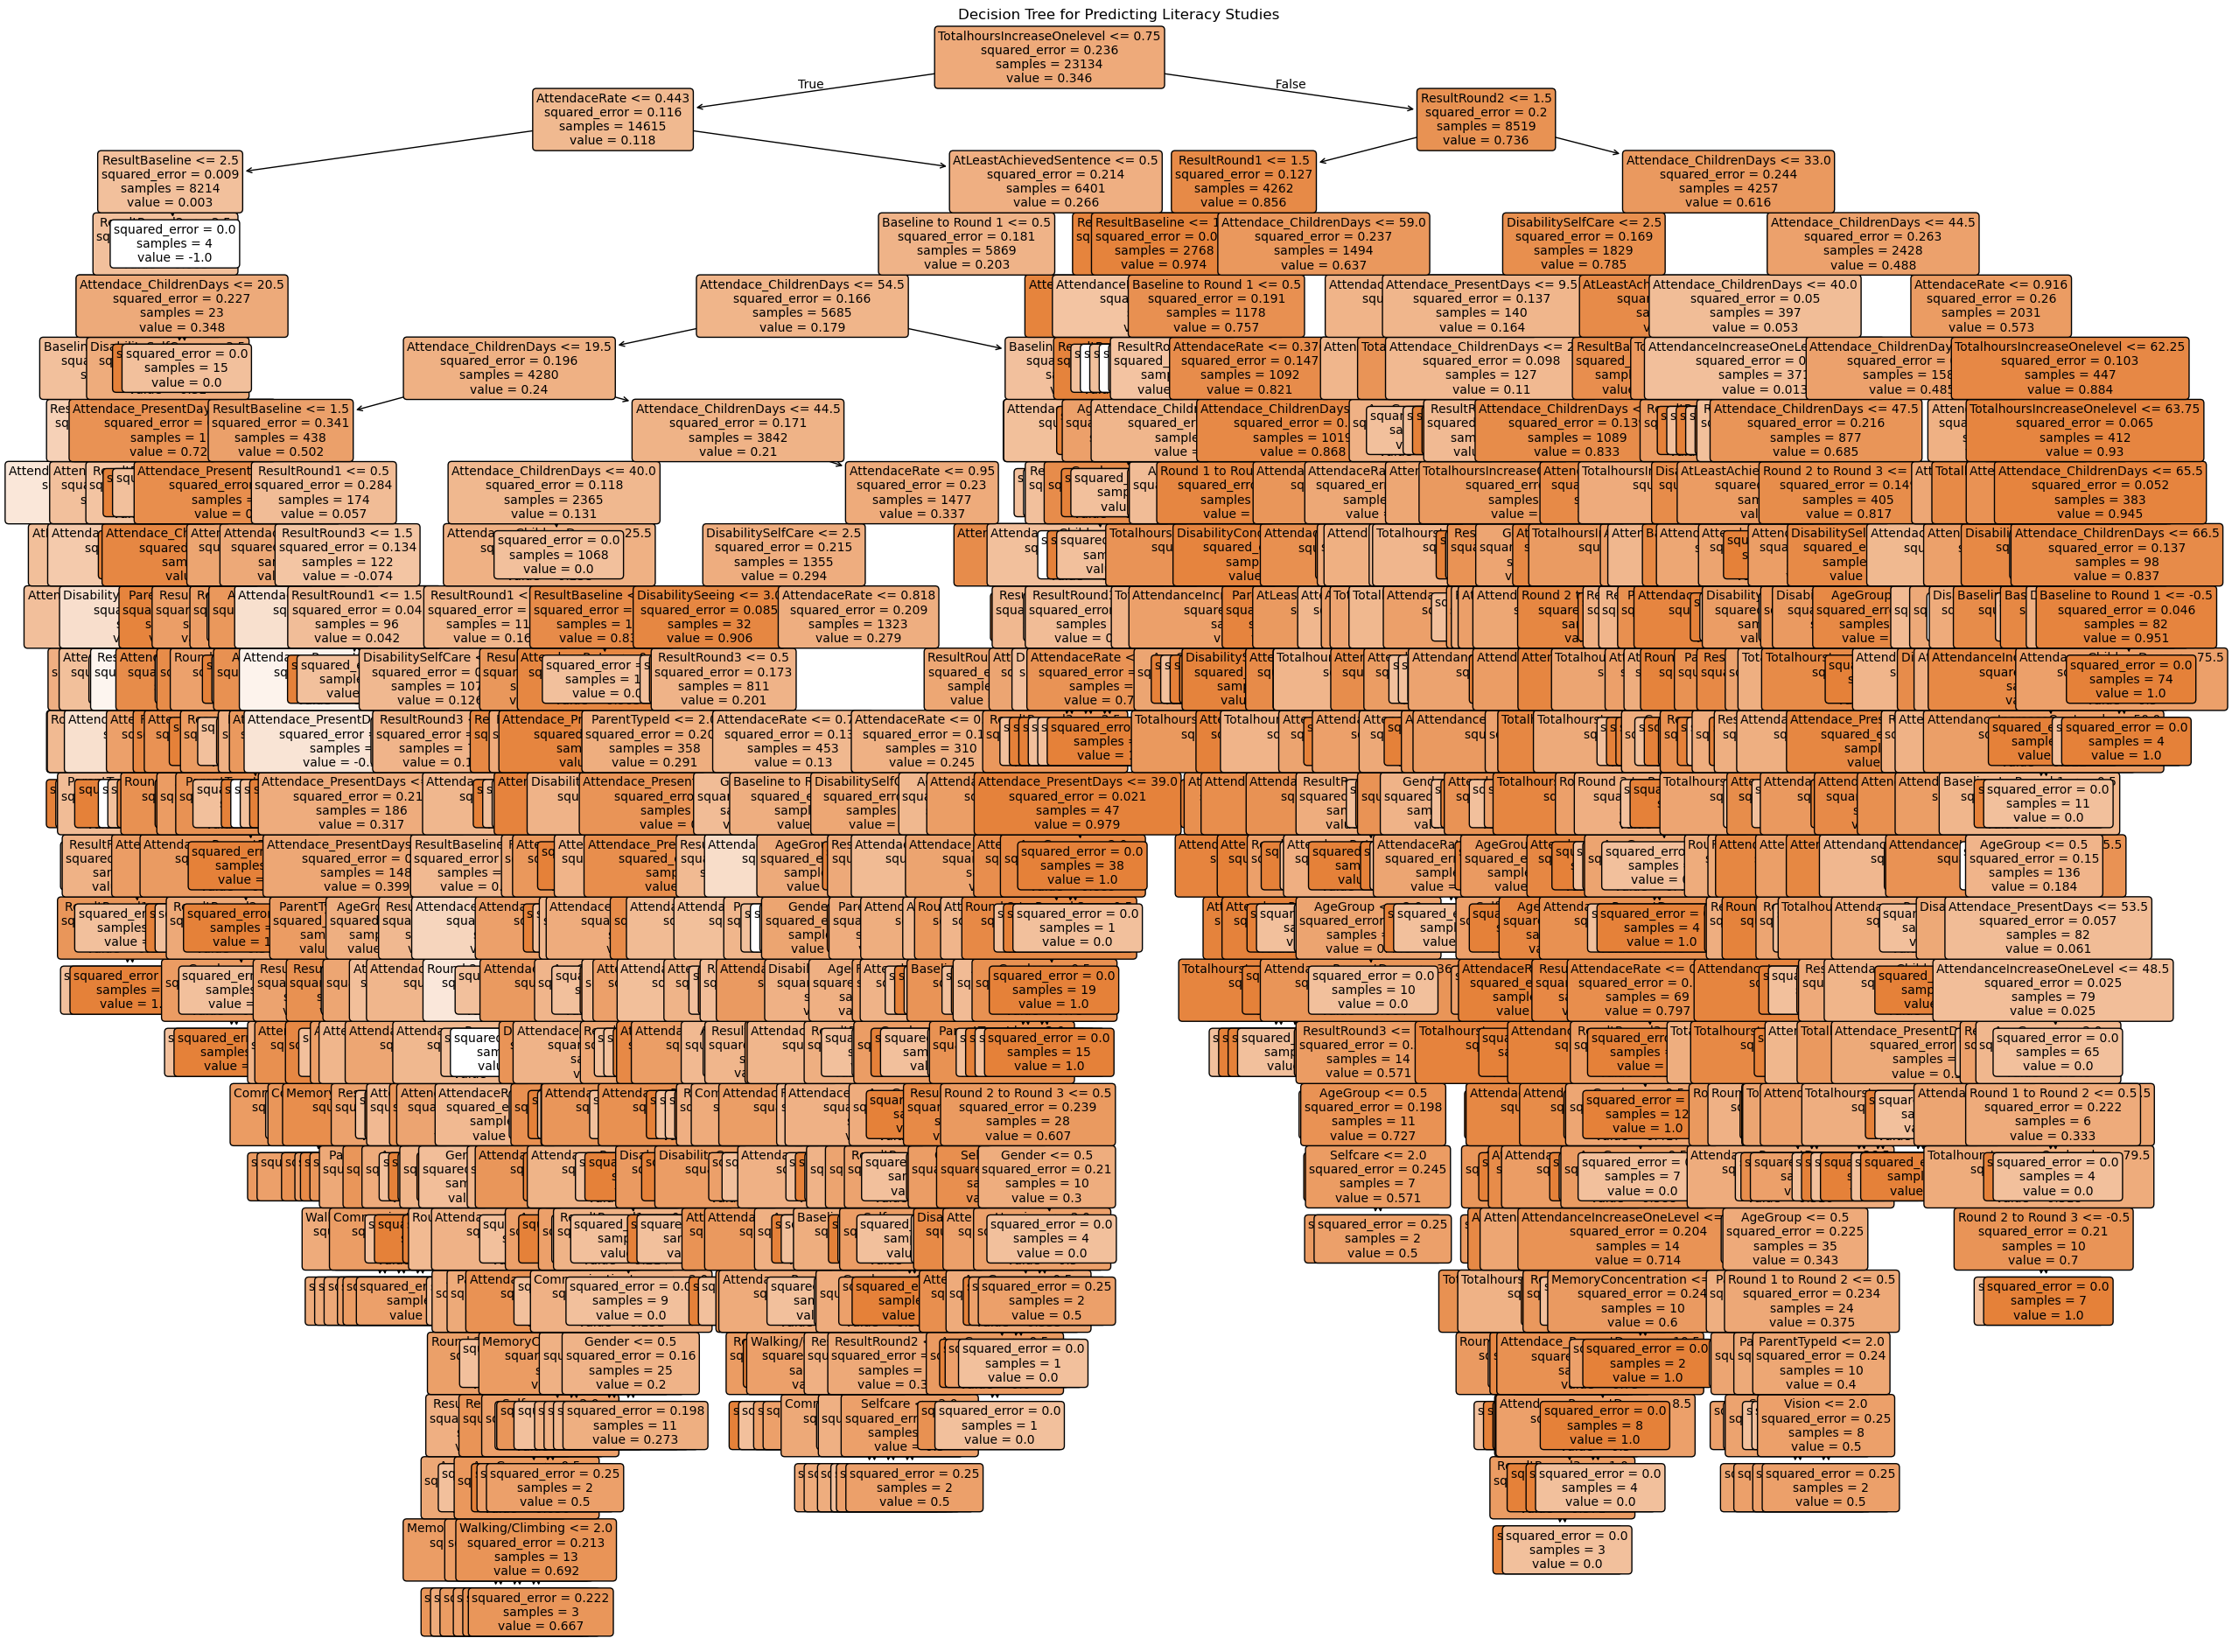

Feature Importances: [4.03127466e-02 3.57585861e-02 3.15948875e-02 2.07465159e-02
 3.92540528e-02 4.14202004e-03 6.04623704e-03 1.36527382e-02
 0.00000000e+00 1.22057895e-02 4.00199455e-01 6.08959690e-02
 3.18941203e-02 1.39399097e-01 1.09054290e-01 9.83962547e-03
 1.50415412e-03 1.78906044e-03 6.53414919e-04 2.27901080e-03
 2.08068178e-02 4.87264620e-04 0.00000000e+00 1.69416489e-02
 5.73678276e-05 2.00878492e-04 6.92735388e-05 7.08781497e-05
 1.43622751e-04 4.77200037e-07 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = merged_data.drop(columns=['Baseline to Endline', 'ResultEndline', 'Round 3 to Endline', 'SchoolId', 'ClassId'])
y = merged_data['Baseline to Endline']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

plt.figure(figsize=(30, 24))
plot_tree(tree, filled=True, feature_names=X.columns, rounded=True, fontsize=10)
plt.title("Decision Tree for Predicting Literacy Studies")
plt.show()
print("Feature Importances:", tree.feature_importances_)


In [20]:
features = X.columns
feature_importances = pd.Series(tree.feature_importances_, index=features)
sorted_importances = feature_importances.sort_values(ascending=False)
print(sorted_importances)

TotalhoursIncreaseOnelevel         4.001995e-01
Attendace_ChildrenDays             1.393991e-01
AttendaceRate                      1.090543e-01
AtLeastAchievedSentence            6.089597e-02
ResultBaseline                     4.031275e-02
Baseline to Round 1                3.925405e-02
ResultRound1                       3.575859e-02
Attendace_PresentDays              3.189412e-02
ResultRound2                       3.159489e-02
DisabilitySelfCare                 2.080682e-02
ResultRound3                       2.074652e-02
AgeGroup                           1.694165e-02
Gender                             1.365274e-02
AttendanceIncreaseOneLevel         1.220579e-02
ParentTypeId                       9.839625e-03
Round 2 to Round 3                 6.046237e-03
Round 1 to Round 2                 4.142020e-03
DisabilitySeeing                   2.279011e-03
DisabilityConcentrating            1.789060e-03
DisabilityCommunicating            1.504154e-03
DisabilityHearing                  6.534

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(n_estimators=200, max_depth = 10, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", mse_rf)

print("Feature Importances:", rf.feature_importances_)


Random Forest Mean Squared Error: 0.033623349962788984
Feature Importances: [4.21641647e-02 3.32216170e-02 3.43330604e-02 9.54836110e-03
 3.99719361e-02 4.39793858e-03 3.23790541e-03 4.34403443e-03
 5.88808996e-05 2.32257634e-01 2.35690302e-01 7.25324221e-02
 1.69676359e-02 1.43803510e-01 9.83485979e-02 1.58345238e-03
 9.66869527e-04 3.97250978e-03 4.34543458e-04 1.92668354e-03
 1.32734524e-02 2.32256564e-03 2.61558090e-04 4.23161052e-03
 3.94342993e-05 3.80581179e-05 1.29298757e-05 4.58006345e-06
 2.51929443e-05 2.85595240e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


ParentTypeId                  0.001583
DisabilitySeeing              0.001927
DisabilityWalking             0.002323
Round 2 to Round 3            0.003238
DisabilityConcentrating       0.003973
AgeGroup                      0.004232
Gender                        0.004344
Round 1 to Round 2            0.004398
ResultRound3                  0.009548
DisabilitySelfCare            0.013273
Attendace_PresentDays         0.016968
ResultRound1                  0.033222
ResultRound2                  0.034333
Baseline to Round 1           0.039972
ResultBaseline                0.042164
AtLeastAchievedSentence       0.072532
AttendaceRate                 0.098349
Attendace_ChildrenDays        0.143804
AttendanceIncreaseOneLevel    0.232258
TotalhoursIncreaseOnelevel    0.235690
dtype: float64


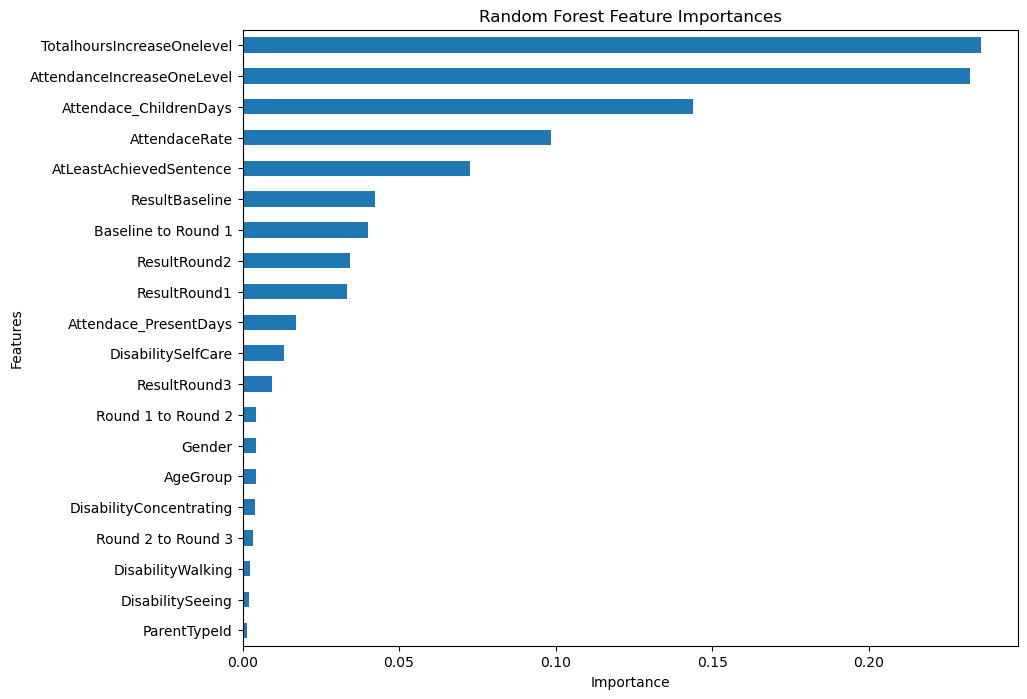

In [22]:
rf_feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

sorted_rf_importances = rf_feature_importances.sort_values(ascending=True).tail(20)

print(sorted_rf_importances)

plt.figure(figsize=(10, 8))
sorted_rf_importances.plot(kind='barh')
plt.title("Random Forest Feature Importances")
plt.ylabel("Features")
plt.xlabel("Importance")
plt.show()

In [23]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()

rfe = RFE(model, n_features_to_select=1)
rfe = rfe.fit(X_train, y_train)

print("Feature Ranking:", rfe.ranking_)


Feature Ranking: [ 7 30 28 15  9  8 32 19  4  1  2  5 29 25  3 27 13 14 18 12 26 21  6 33
 23 22 16 24 31 17 20 10 11]


AttendanceIncreaseOneLevel          1
TotalhoursIncreaseOnelevel          2
AttendaceRate                       3
TrackIncreaseOneLevel               4
AtLeastAchievedSentence             5
LearnerAskingDisabilityQuestion     6
ResultBaseline                      7
Round 1 to Round 2                  8
Baseline to Round 1                 9
IsRadioTVAvailable?                10
IsTelephoneAvailable?              11
DisabilitySeeing                   12
DisabilityCommunicating            13
DisabilityConcentrating            14
ResultRound3                       15
Hearing                            16
Walking/Climbing                   17
DisabilityHearing                  18
Gender                             19
IsElectricityAvailable?            20
DisabilityWalking                  21
MemoryConcentration                22
CommunicationIssue                 23
Vision                             24
Attendace_ChildrenDays             25
DisabilitySelfCare                 26
ParentTypeId

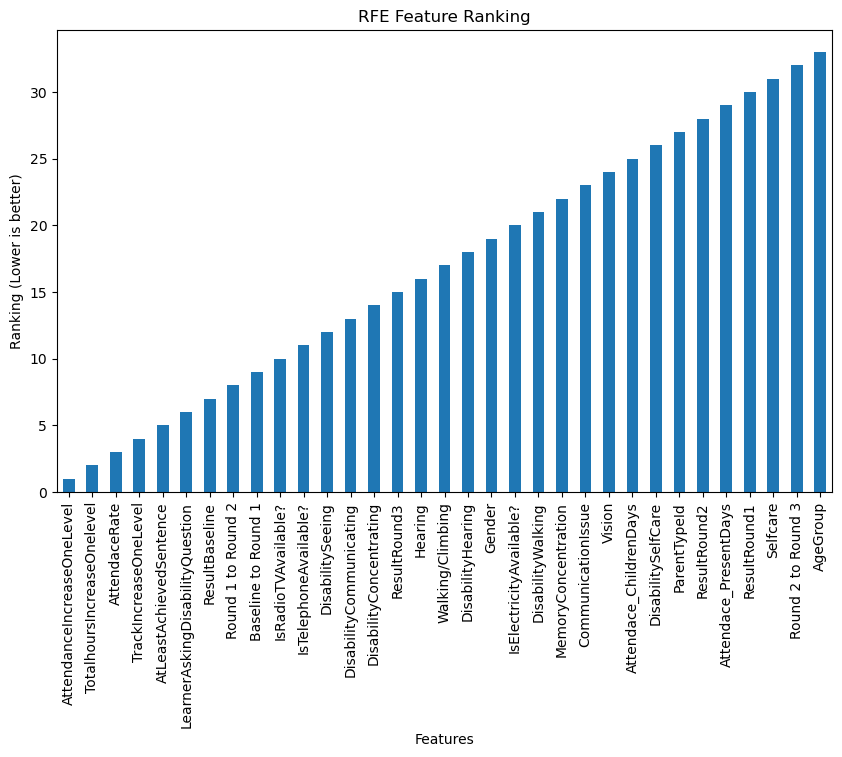

In [24]:
rfe_ranking = pd.Series(rfe.ranking_, index=X.columns)

sorted_rfe_ranking = rfe_ranking.sort_values()

print(sorted_rfe_ranking)

plt.figure(figsize=(10, 6))
sorted_rfe_ranking.plot(kind='bar')
plt.title("RFE Feature Ranking")
plt.xlabel("Features")
plt.ylabel("Ranking (Lower is better)")
plt.show()

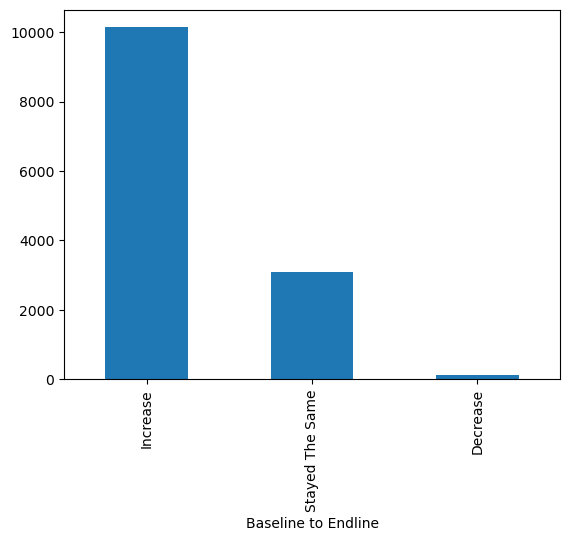

In [25]:
import matplotlib.pyplot  as plt
df['Baseline to Endline'].value_counts().plot(kind = 'bar')
plt.show()

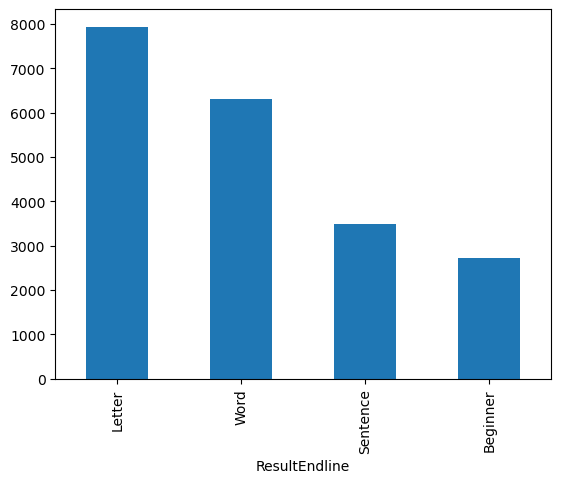

In [26]:
df['ResultEndline'].value_counts().plot(kind = 'bar')
plt.show()

ParentTypeId
1.0    22882
3.0     5093
2.0      935
Name: count, dtype: int64


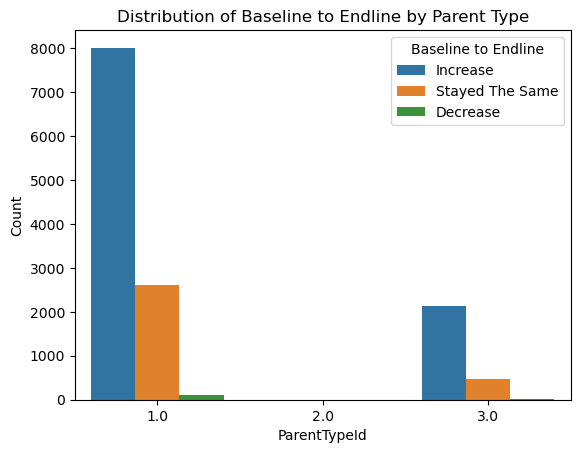

In [27]:
parent_counts = df['ParentTypeId'].value_counts()
print(parent_counts)

# Distribution of Baseline to Endline by ParentType
sns.countplot(data=df, x='ParentTypeId', hue='Baseline to Endline')
plt.title('Distribution of Baseline to Endline by Parent Type')
plt.ylabel('Count')
plt.show()


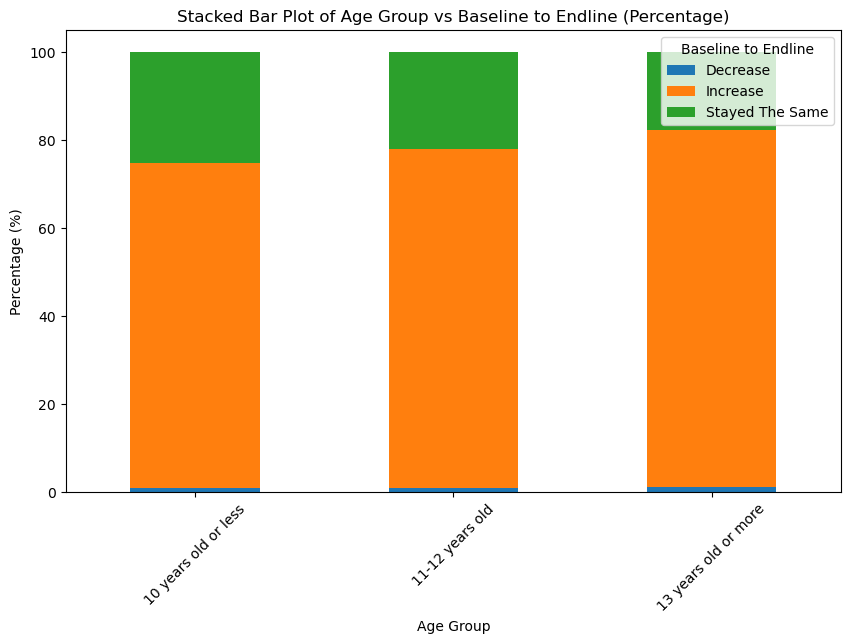

In [28]:
counts = df.groupby(['AgeGroup', 'Baseline to Endline']).size().unstack()

# Convert the counts to percentages
percentage_counts = counts.div(counts.sum(axis=1), axis=0) * 100

# Create a stacked bar plot with percentages
percentage_counts.plot(kind='bar', stacked=True, figsize=(10,6))

plt.title('Stacked Bar Plot of Age Group vs Baseline to Endline (Percentage)')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.legend(title='Baseline to Endline')
plt.xticks(rotation=45)
plt.show()

What are the predictors for learners who stay at beginner or letter level even after one or two cycles of intervention?  

In [30]:
merged_data['Still_Beginner_Letter'] = merged_data.apply(
    lambda row: 1 if (row['ResultRound1'] in [1, 2]) and 
                    (row['ResultRound2'] in [1, 2]) else 0, axis=1
)

In [31]:
X = merged_data.drop(columns=['Still_Beginner_Letter', 'ResultEndline', 'ResultRound1', 'ResultRound2'])
y = merged_data['Still_Beginner_Letter']

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

print(sorted_importances)


Accuracy: 0.9930843706777317
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4288
           1       0.99      0.98      0.99      1496

    accuracy                           0.99      5784
   macro avg       0.99      0.99      0.99      5784
weighted avg       0.99      0.99      0.99      5784

Round 1 to Round 2                 0.148083
ClassId                            0.100540
AttendaceRate                      0.089489
Round 2 to Round 3                 0.088669
ResultRound3                       0.084857
SchoolId                           0.080842
Attendace_PresentDays              0.079303
Attendace_ChildrenDays             0.067236
AttendanceIncreaseOneLevel         0.041666
TotalhoursIncreaseOnelevel         0.035777
Baseline to Round 1                0.028566
AgeGroup                           0.019773
ResultBaseline                     0.017871
Gender                             0.014314
Round 3 to Endline          

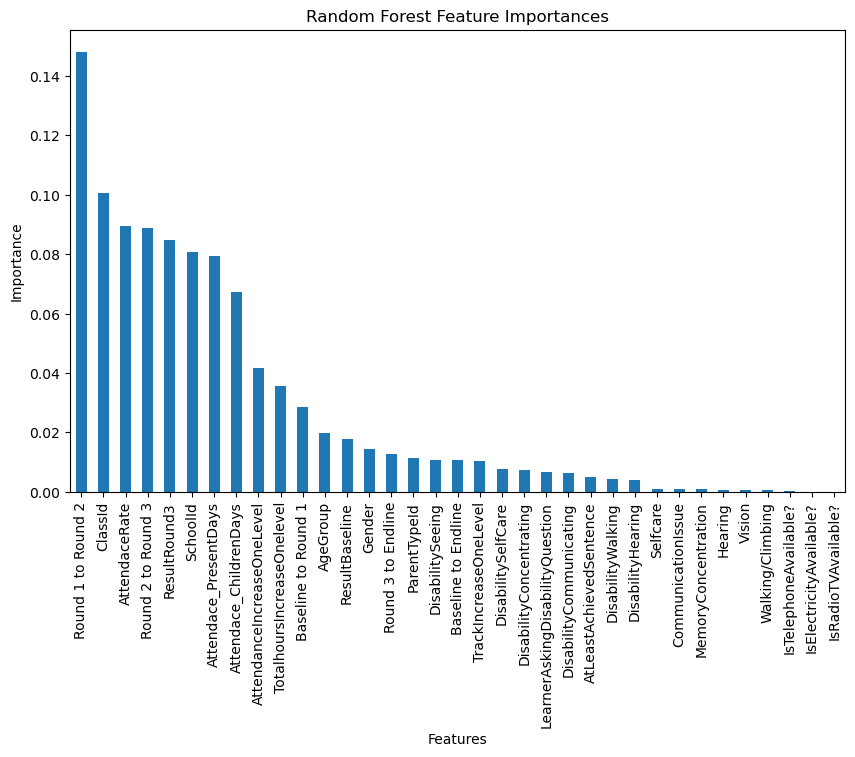

In [32]:
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='bar')
plt.title("Random Forest Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

What is the likelihood for success for learners with disabilities (lot of difficulty or cannot do at all on one or more of the 6 disability domains)? 

In [34]:
import pandas as pd

data = pd.read_excel('Nigeria CuC Data - 2024 10 08.xlsx', sheet_name = 4)

result_mapping = {
    "Beginner": 1,
    "Letter": 2,
    "Word": 3,
    "Sentence": 4,
    "Story": 5
}
data['ResultEndline'] = data['ResultEndline'].map(result_mapping)

data['LearnerWithDisability'] = data['LearnerWithDisability'].fillna(0)
data['LearnerWithDisability'] = data['LearnerWithDisability'].apply(lambda x: 1 if x == 'Yes' else 0)

grouped_results = data.groupby('LearnerWithDisability')['ResultEndline'].mean().reset_index()

print(grouped_results)

   LearnerWithDisability  ResultEndline
0                      0       2.569004


   HasDisability  SuccessRate
0              0     0.123243
1              1     0.118812


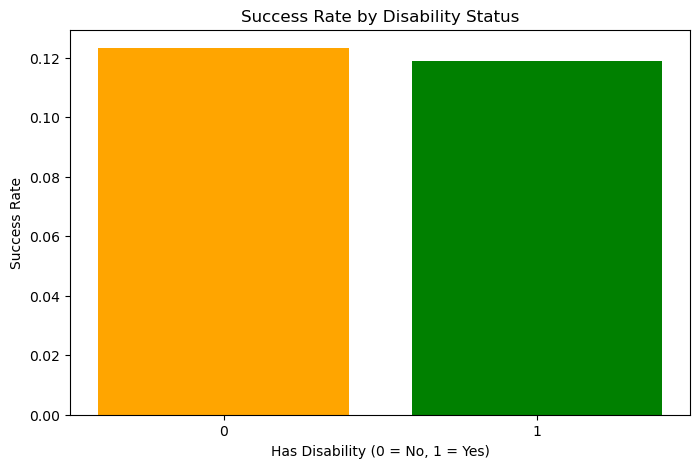

   HasDisability  ResultEndline
0              0       2.568969
1              1       2.571429


In [35]:
import pandas as pd

data_a = pd.read_excel('Nigeria CuC Data - 2024 10 08.xlsx', sheet_name=4)
data_b = pd.read_excel('Nigeria CuC Data - 2024 10 08.xlsx', sheet_name=3)
combined_data = pd.merge(data_a, data_b, on="ChildrenId")

disability_mapping = {
    "Cannot_do_at_all": 1,
    "A lot of difficulty": 2,
    "lot_difficulty": 2,
    "Some difficulty": 3,
    "some_difficulty": 3,
    "No difficulty": 4,
    "no_difficulty": 4,
    "don't_know": 0,
    "refused": 0
}

disability_cols = [
    'DisabilityCommunicating', 'DisabilityWalking', 'DisabilitySelfCare',
    'DisabilitySeeing', 'DisabilityHearing', 'DisabilityConcentrating'
]

for col in disability_cols:
    combined_data[col] = combined_data[col].map(disability_mapping)

combined_data['HasDisability'] = combined_data[disability_cols].apply(
    lambda row: 1 if row.isin([1, 2]).any() else 0, axis=1
)

reading_level_mapping = {
    "Beginner": 1,
    "Letter": 2,
    "Word": 3,
    "Sentence": 4,
    "Story": 5
}
combined_data['ResultEndline'] = combined_data['ResultEndline'].map(reading_level_mapping)

combined_data['Success'] = combined_data['ResultEndline'].apply(lambda x: 1 if x >= 4 else 0)
success_rates = combined_data.groupby('HasDisability')['Success'].mean().reset_index()
success_rates.columns = ['HasDisability', 'SuccessRate']

print(success_rates)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.bar(success_rates['HasDisability'].astype(str), success_rates['SuccessRate'], color=['orange', 'green'])
plt.xlabel('Has Disability (0 = No, 1 = Yes)')
plt.ylabel('Success Rate')
plt.title('Success Rate by Disability Status')
plt.show()
grouped_results = combined_data.groupby('HasDisability')['ResultEndline'].mean().reset_index()
print(grouped_results)

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5119
           1       1.00      1.00      1.00       665

    accuracy                           1.00      5784
   macro avg       1.00      1.00      1.00      5784
weighted avg       1.00      1.00      1.00      5784

AtLeastAchievedSentence            0.782806
ResultRound3                       0.025085
TrackIncreaseOneLevel              0.023423
Round 3 to Endline                 0.018907
Attendace_ChildrenDays             0.017135
ClassId                            0.014989
SchoolId                           0.012753
Attendace_PresentDays              0.012287
ResultRound1                       0.010586
AttendaceRate                      0.010299
Baseline to Endline                0.009814
ResultBaseline                     0.008667
ResultRound2                       0.006303
DisabilityConcentrating            0.005870
LearnerAskingDisabilityQuestion    0.004009

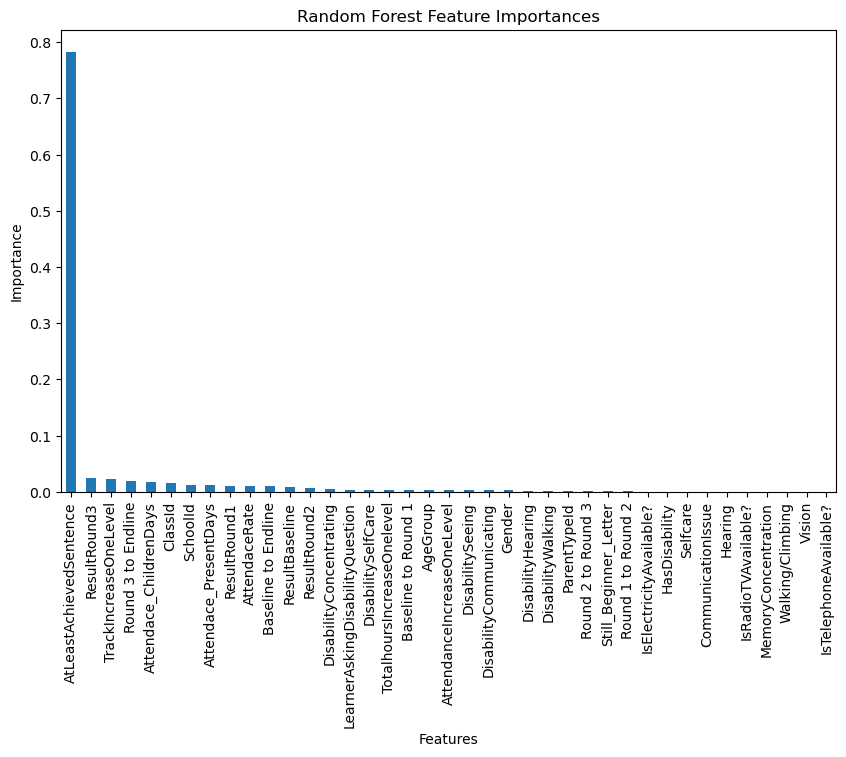

In [36]:
disability_cols = ['DisabilityCommunicating', 'DisabilityWalking', 'DisabilitySelfCare', 
                   'DisabilitySeeing', 'DisabilityHearing', 'DisabilityConcentrating']

merged_data['HasDisability'] = merged_data[disability_cols].apply(
    lambda row: 1 if (row.isin([1, 2])).any() else 0, axis=1
)
merged_data['Success'] = merged_data['ResultEndline'].apply(lambda x: 1 if x >= 4 else 0)
X = merged_data.drop(columns=['Success', 'ResultEndline']) 
y = merged_data['Success'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

print(sorted_importances)

plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='bar')
plt.title("Random Forest Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [37]:
has_disability_data = merged_data[merged_data['HasDisability'] == 1]
predicted_probabilities = rf_classifier.predict_proba(has_disability_data.drop(columns=['Success', 'ResultEndline']))[:, 1]  # 成功的概率

print(predicted_probabilities)

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.01 0.01 0.01 0.01
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0

   ResultEndline  Success
0            0.0        0
1            0.0        0
2            0.0        0
3            0.0        0
4            0.0        0
Success Rate by Attendance Rate Groups:
AttendaceRate
(0.0, 0.1]    0.026490
(0.1, 0.2]    0.014950
(0.2, 0.3]    0.027941
(0.3, 0.4]    0.017516
(0.4, 0.5]    0.075482
(0.5, 0.6]    0.063893
(0.6, 0.7]    0.096672
(0.7, 0.8]    0.099210
(0.8, 0.9]    0.094857
(0.9, 1.0]    0.069772
Name: Success, dtype: float64


/var/folders/6p/q41l2krj1cz3hwv9h1nm7lbr0000gn/T/ipykernel_19951/2901034778.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attendance_groups = merged_data.groupby(pd.cut(merged_data['AttendaceRate'], np.arange(0, 1.1, 0.1)))['Success'].mean()


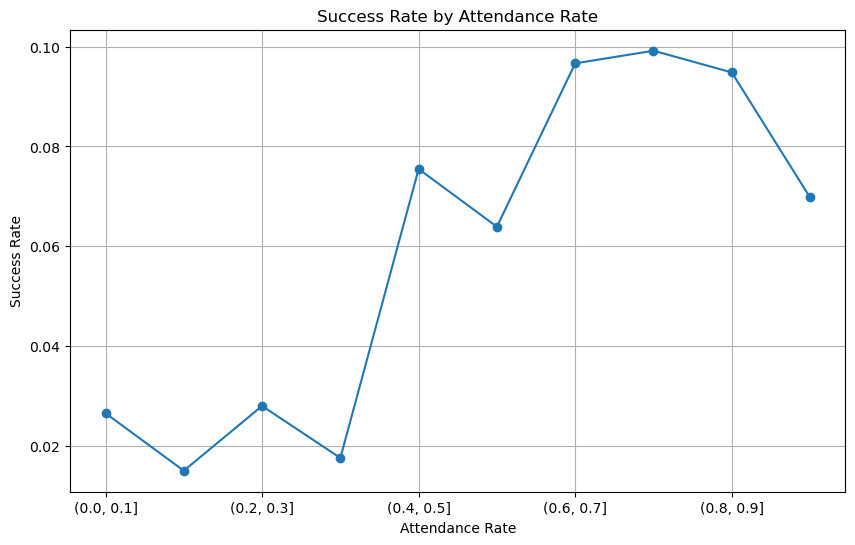

For attendance as a predictor, the minimum level for achieving expected outcome of reading with comprehension is 0.7


In [38]:
merged_data['Success'] = merged_data['ResultEndline'].apply(lambda x: 1 if x >= 4 else 0)

print(merged_data[['ResultEndline', 'Success']].head())

attendance_groups = merged_data.groupby(pd.cut(merged_data['AttendaceRate'], np.arange(0, 1.1, 0.1)))['Success'].mean()

print("Success Rate by Attendance Rate Groups:")
print(attendance_groups)

plt.figure(figsize=(10, 6))
attendance_groups.plot(kind='line', marker='o')
plt.title("Success Rate by Attendance Rate")
plt.xlabel("Attendance Rate")
plt.ylabel("Success Rate")
plt.grid()
plt.show()

print("For attendance as a predictor, the minimum level for achieving expected outcome of reading with comprehension is 0.7")

Average Progress by Initial Reading Level:
ResultBaseline
0.0    0.000000
1.0    0.500027
2.0    0.361418
3.0    0.196078
4.0   -0.166667
5.0    0.000000
Name: Baseline to Endline, dtype: float64


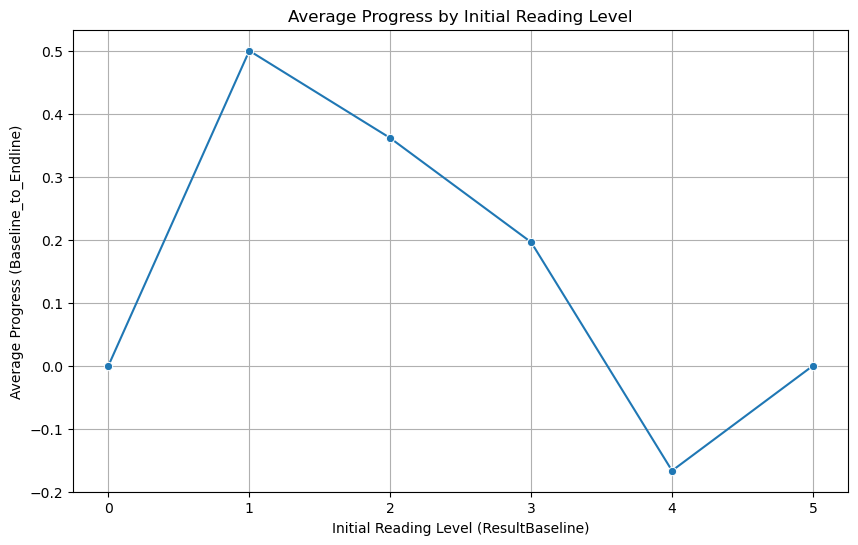

In [39]:
avg_progress_by_baseline = merged_data.groupby('ResultBaseline')['Baseline to Endline'].mean()

print("Average Progress by Initial Reading Level:")
print(avg_progress_by_baseline)

plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_progress_by_baseline.index, y=avg_progress_by_baseline.values, marker='o')
plt.title("Average Progress by Initial Reading Level")
plt.xlabel("Initial Reading Level (ResultBaseline)")
plt.ylabel("Average Progress (Baseline_to_Endline)")
plt.grid()
plt.show()

Except for blank data, the lower the overall baseline level, the more likely it is to improve overall

In [41]:
# sel_score = pd.read_csv('sel_score.csv')
# merged_data = pd.merge(merged_data, sel_score, on='ChildrenId', how='inner')
# print(merged_data.shape[0])

In [42]:
grouped_data = merged_data.groupby('Baseline to Endline')['sel_total'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=grouped_data, x='Baseline to Endline', y='sel_total')
plt.xlabel('Baseline to Endline')
plt.ylabel('Average sel_score')
plt.show()

KeyError: 'Column not found: sel_total'

In [ ]:
print(md[['AcademicYearName']].head())

In [ ]:
md['Contains_VYA'] = md['AcademicYearName'].apply(lambda x: 1 if 'VYA' in str(x) else 0)
tmp = md[md['Contains_VYA'] == 1]
print(tmp[['Contains_VYA']])
grouped_by_yva = md.groupby('Contains_VYA')['ResultEndline'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=grouped_by_yva, x='Contains_VYA', y='ResultEndline')
plt.title('Baseline to Endline Progress by VYA Containment in Academic Year')
plt.xlabel('Contains VYA (True/False)')
plt.ylabel('Average Baseline to Endline Progress')
plt.show()

Learners who receive SEL interventions (through VYA sessions) are less likely to do better in their CuC club literacy outcomes than those who do not receive it.
Learners who participate in SEL intervention may face more learning difficulties or challenges themselves, and therefore may perform weaker.